## Mission 2. Abengers, Assemble!
Bicsubi를 다 만들고 보니 사이렌이 울렸다. 국제보안기구 <U.B.U.N.T.U>에게서 긴급 이메일이 도착했다. 죄없는 컴퓨터들에게 무차별적인 Request를 통해 이상상태로 만드는 악당 <디도스>가 인터넷을 침략하려고 한다는 소식을 전했다. 이를 막기 위해 최정예부대인 우리는 Abengers (저작권을 조심합시다) 를 소집하기로 했다. 도와줘요 Abengers!

- 이 미션은 [다음 데이터셋](https://www.kaggle.com/dannielr/marvel-superheroes?select=charcters_stats.csv)을 이용해서 진행합니다.
- 제출할 파일 : abengers.ipynb

### Core Mission
- 다음 질문에 답하시오.

    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.


# Exploratory Data Analysis

탐색적 데이터 분석을 통해 데이터를 통달해봅시다. with Titanic Data



### 0. 라이브러리 준비

In [1]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# data는 `./datasets/train.csv`에 있음
# 데이터 불러오기

stats = pd.read_csv("./datasets/charcters_stats.csv")
stats.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [3]:
import pandas as pd
import matplotlib.pyplot

#### 1. stats 수치의 합이 가장 큰 캐릭터는 누구인가?

In [4]:
max_char = stats[stats.Total == stats.Total.max()]
max_char

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


- Martian Manhunter의 능력치가 가장 높았다.

In [5]:
x = max_char.values[0][2:-1]
y = max_char.columns[2:-1]
name = max_char['Name'].values[0]

print(name)
print(x)
print(y)

Martian Manhunter
[100 100 96 100 100 85]
Index(['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'], dtype='object')


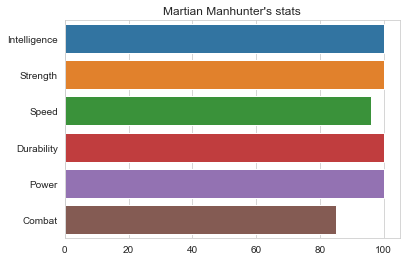

In [6]:
sns.set_style('whitegrid')

sns.barplot(x=x, y=y)

plt.title(name + '\'s stats')
plt.show()

- 거의 꽉찬 그래프를 보여준다.

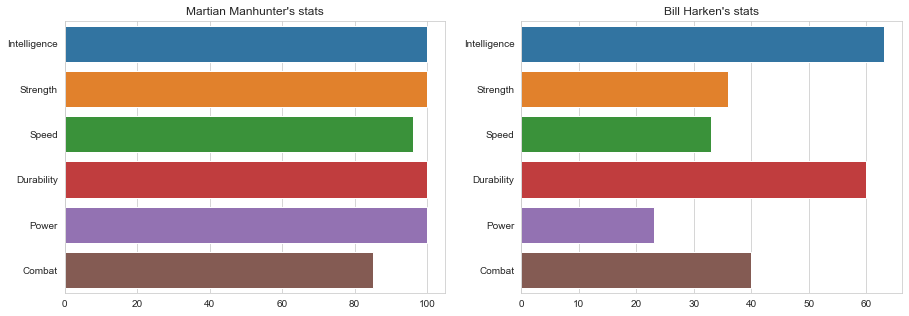

In [7]:

median_char = stats[stats.Total == stats.Total.median()]
median_char

median_x = median_char.values[0][2:-1]
median_y = median_char.columns[2:-1]
median_name = median_char['Name'].values[0]


plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.barplot(x=x, y=y)
plt.title(name + '\'s stats')

plt.subplot(122)
sns.barplot(x=median_x, y=median_y)
plt.title(median_name + '\'s stats')

plt.show()

- 중앙값(median)을 가진 데이터와 비교했을 때, 많은 차이 보인다.

 #### 2.  좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다.

count    432.000000
mean     214.990741
std      163.305515
min        5.000000
25%        5.000000
50%      244.000000
75%      339.750000
max      581.000000
Name: Total, dtype: float64


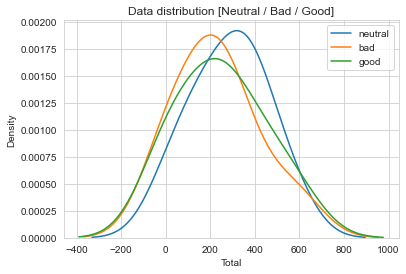

In [8]:
g = stats[stats.Alignment == 'good'].Total.describe()
b = stats[stats.Alignment == 'bad'].Total.describe()
n = stats[stats.Alignment == 'neutral'].Total.describe()

print(g)

sns.kdeplot(n)
sns.kdeplot(b)
sns.kdeplot(g)
plt.legend(['neutral', 'bad', 'good'])
plt.title('Data distribution [Neutral / Bad / Good]')
plt.show()

- 'Alignment'를 기준으로 Total에 대한 분포를 보여준다.

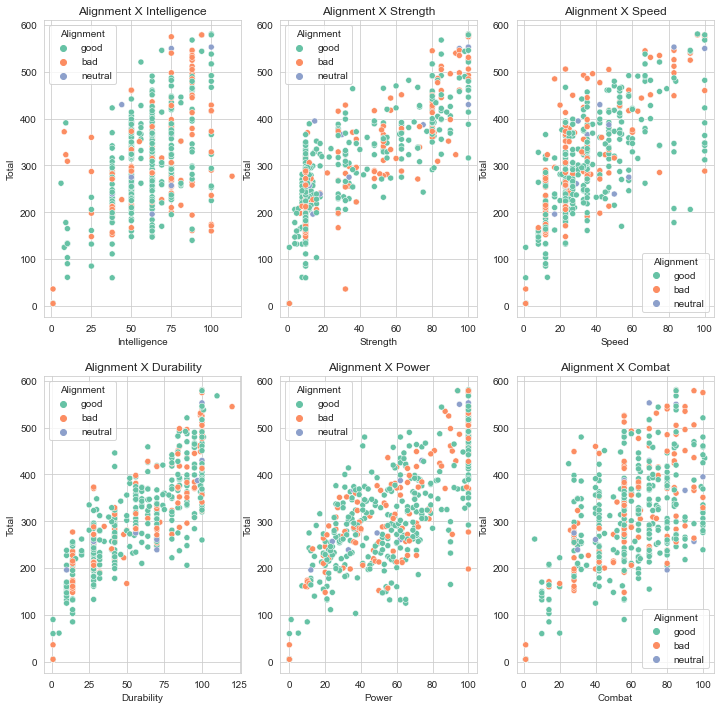

In [9]:
plt.figure(figsize=(12, 12))
plt.subplot(231)
sns.scatterplot(x='Intelligence', y='Total', hue='Alignment', data=stats, palette='Set2')
plt.title('Alignment X Intelligence')
plt.subplot(232)
sns.scatterplot(x='Strength', y='Total', hue='Alignment', data=stats, palette='Set2')
plt.title('Alignment X Strength')
plt.subplot(233)
sns.scatterplot(x='Speed', y='Total', hue='Alignment', data=stats, palette='Set2')
plt.title('Alignment X Speed')
plt.subplot(234)
sns.scatterplot(x='Durability', y='Total', hue='Alignment', data=stats, palette='Set2')
plt.title('Alignment X Durability')
plt.subplot(235)
sns.scatterplot(x='Power', y='Total', hue='Alignment', data=stats, palette='Set2')
plt.title('Alignment X Power')
plt.subplot(236)
sns.scatterplot(x='Combat', y='Total', hue='Alignment', data=stats, palette='Set2')
plt.title('Alignment X Combat')
plt.show()

- 'Alignment'를 기준으로 각 능력마다의 분포를 산점도로 표현해보았다.
- 데이터들이 각을 잡고 펼쳐진 것이 데이터를 인위적으로 만든 것이 아닐까 하는 생각도 든다.

### Extra Mission
- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
    - 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.
    - 이 과제는 핵심 임무 이후에 진행되어야 한다.

#### 1. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가?
- 다양한 능력치가 필요하다. 
    - character_stats - `Total`
- comics 회사의 이름이 필요하다. 
    - mavel_characters_info - `Publisher`

In [10]:
stats = pd.read_csv("./datasets/charcters_stats.csv")
info = pd.read_csv("./datasets/marvel_characters_info.csv")

print(stats.columns)
print(info.columns)

Index(['Name', 'Alignment', 'Intelligence', 'Strength', 'Speed', 'Durability',
       'Power', 'Combat', 'Total'],
      dtype='object')
Index(['ID', 'Name', 'Alignment', 'Gender', 'EyeColor', 'Race', 'HairColor',
       'Publisher', 'SkinColor', 'Height', 'Weight'],
      dtype='object')


In [11]:
stats_info = pd.merge(stats, info, on='Name', how='inner')

stats_info.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,A-Bomb,good,38,100,17,80,17,64,316,0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,Abe Sapien,good,88,14,35,42,35,85,299,1,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,Abin Sur,good,50,90,53,64,84,65,406,2,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,Abomination,bad,63,80,53,90,55,95,436,3,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,Abraxas,bad,88,100,83,99,100,56,526,4,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


- 'Publisher'를 알기 위해 info 데이터와 합쳤다.
- 'Name'을 기준으로 교집합이 되는 것을 합쳤다.

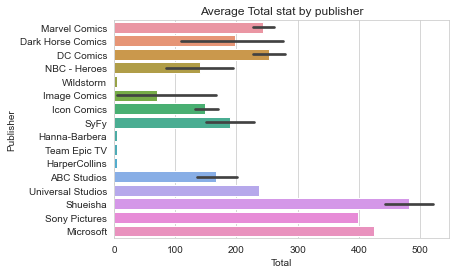

In [12]:
sns.barplot(x='Total', y='Publisher', data=stats_info)

plt.title("Average Total stat by publisher")
plt.show()

- 'Publisher'를 기준으로 능력치의 합에 대한 평균을 나타냈다.
- 'Shueisha' 회사의 캐릭터의 능력치 평균이 가장 높음을 알 수 있다.

#### 2. Good/Bad의 어떤 캐릭터 진영이 승리할 것인가?
- 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다.  
    - `Total`, `Alignment`
- 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다.

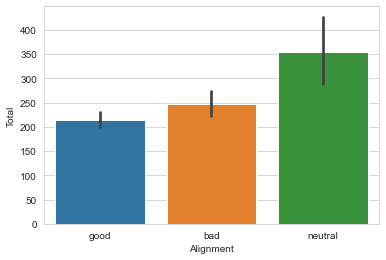

In [13]:
sns.barplot(x='Alignment', y='Total', data=stats)

plt.show()

- 'Good', 'Bad', 'Neutral'의 평균 능력치는 위와 같다고 할 수 있다.
- 'Good'진영과  'Bad'진영이 격돌하는 경우 'Bad' 진영이 이길 것으로 추측된다.
- 따라서 'Neutral' 캐릭터들이 열세인 'Good' 진영에 가세했을 때의 상황을 판단해 볼 것이다.ㅍ

In [14]:
g_n_vs_b = stats[['Alignment', 'Total']]

g_n_vs_b

,Alignment,Total
0,good,233
1,good,316
2,good,299
3,good,406
4,bad,436
...,...,...
606,good,164
607,good,182
608,good,388
609,good,292


In [15]:
g_n_vs_b.Alignment.unique()

array(['good', 'bad', nan, 'neutral'], dtype=object)

In [16]:
g_n_vs_b.loc[g_n_vs_b.Alignment == 'neutral', 'Alignment'] = 'good'
g_n_vs_b.loc[g_n_vs_b.Alignment.isnull(), 'Alignment'] = 'good'
g_n_vs_b.Alignment.unique()

C:\Users\LMH-laptop\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['good', 'bad'], dtype=object)

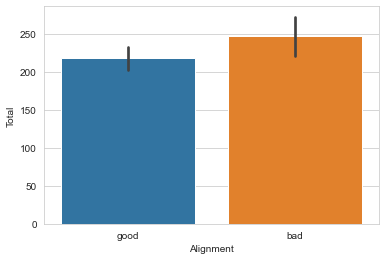

In [17]:
sns.barplot(x='Alignment', y='Total', data=g_n_vs_b)

plt.show()

- 그래도 승부를 뒤집지 못할 것 같다.
- 그 이유를 살펴봐야겠다.

In [18]:
stats.groupby(['Alignment']).mean().Total

Alignment
bad        247.212121
good       214.990741
neutral    355.363636
Name: Total, dtype: float64

- 모든 진영의 평균값은 위의 표와 같은 값을 나타낸 것을 볼 수 있다.
- 'neutral'이 엄청나게 높은 것을 보아 'good' 진영에 꽤 도움이 될 것이라고 생각했다.
    - 이미 살펴봤지만, 그렇지 못했다.

Alignment
bad        165
good       432
neutral     11
Name: Total, dtype: int64


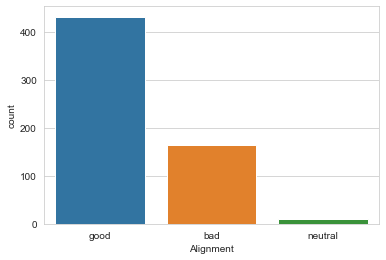

In [19]:
print(stats.groupby(['Alignment']).count().Total)

sns.countplot(x = 'Alignment', data=stats)
plt.show()

- 그 이유는 수에 있었다.
    - 'neutal' 진영의 평균 능력치는 높지만, 수가 너무 부족한 것이다.
        - (수치상으로는 11이지만 결측치를 'neutral'로 보았기 때문에 14: 그래도 적다..!)
    - 따라서, 'good' 진영의 평균 능력치를 올려주지 못했다.